# Nomination via SGM

This class implements Vertex Nomination via Seeded Graph Matching (VNviaSGM) with the algorithm described in [1].

Given two graphs $G_1$ and $G_2$ with associated adjacency matrices $A$ and $B$, VNviaSGM proposes a nomination list of potential matches in graph $G_2$ to a vertex of interest $voi \in G_1$ with associated probabilities. 

Let $A_L(a)$ be the induced subgraph derived from $A$, and centered about vertex $a \in A$ with a maximum distance from $a$ of $L$. VNviaSGM first finds $A_L(voi)$, and if no seeds are in this subgraph, the algorithm stops early and returns a nomination list of None.

Define $S_A \subset A_L(voi)$ to be the seed vertices in the subgraph centered around the voi, with associated seeds from graph $B$ ($S_B$). 

Two subgraphs are then generated around $S_A$ for graph $A$, as well as around the associated seeds $S_B$ for graph $B$.

Specifically, define $SG_1 = \underset{s_A \in S_A}{\bigcup} A_L(s_A)$ and  $SG_2 = \underset{s_B \in S_B}{\bigcup} B_L(s_B)$

These subgraphs ($SG_1$ and $SG_2$) are matched using SGM over several random initializations, resulting in probabilities corresponding to the proportion in which a node in $B$ is matching to the voi. See [Graph Matching Algorithm Reference](https://graspologic.readthedocs.io/en/latest/reference/match.html#graph-matching) for more details. 



[1] Patsolic, HG, Park, Y, Lyzinski, V, Priebe, CE. Vertex nomination via seeded graph matching. Stat Anal Data Min: The ASA Data Sci Journal. 2020; 13: 229– 244. https://doi.org/10.1002/sam.11454


In [1]:
from graspologic.nominate import VNviaSGM
from graspologic.simulations import er_np
from graspologic.plot import heatmap
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

/opt/hostedtoolcache/Python/3.8.6/x64/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
# Define parameters
n = 50
p = 0.3
num_seeds = 4

voi = 5 # choose a vertex of interest

<AxesSubplot:title={'center':'Shuffled ER graph'}>

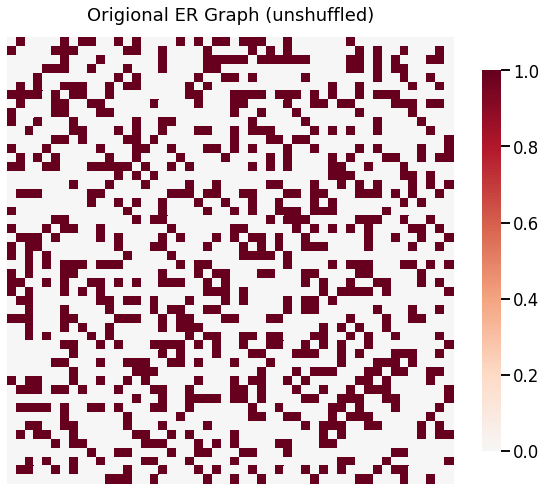

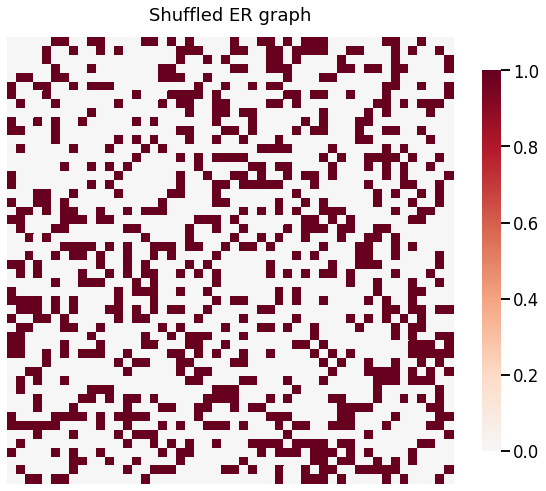

In [3]:
np.random.seed(2)
G1 = er_np(n=n, p=p)
node_shuffle_input = np.random.permutation(n)

G2 = G1[np.ix_(node_shuffle_input, node_shuffle_input)]

heatmap(G1, title = "Origional ER Graph (unshuffled)")
heatmap(G2, title = "Shuffled ER graph")

In [4]:
kklst= [(xx, yy) for xx, yy in zip(node_shuffle_input, np.arange(len(node_shuffle_input)))]
kklst.sort(key=lambda x:x[0])
print("Association voi in G1 to vertex in G2 =", kklst[voi])
kklst = np.array(kklst)

Association voi in G1 to vertex in G2 = (5, 37)


The algorithm produces an $n \times 2$ nomination list, where n is the number of nominees. Each row has the following format (vertex $j \in G_2$, probability that j matches voi). Note: the output is sorted with the largest probability coming first in the output list. 

In [5]:
VNalg = VNviaSGM()
print(VNalg.fit_predict(G1, G2, voi, [kklst[0:num_seeds, 0], kklst[0:num_seeds, 1]]))

[[37.  1.]
 [48.  0.]
 [25.  0.]
 [ 7.  0.]
 [ 8.  0.]
 [11.  0.]
 [14.  0.]
 [19.  0.]
 [21.  0.]
 [23.  0.]
 [26.  0.]
 [45.  0.]
 [34.  0.]
 [35.  0.]
 [38.  0.]
 [40.  0.]
 [41.  0.]
 [42.  0.]
 [43.  0.]
 [24.  0.]]


As seen, the actual correspondence is 5--37 and the model predicts that 5 (in graph $G_1$) matches with 37 (in graph $G_2$) with >90% confidence.